In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import git

In [2]:
repo = git.Repo("./", search_parent_directories=True)
homedir = repo.working_dir
df = pd.read_csv(f"{homedir}/data/international/covid/Johns_Hopkins_data/jhu_csse_processed.csv")

In [6]:
df.sample(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths
3636,Jiangxi,China,27.6140,115.7221,2020-02-06,600,0
132,NaN,Indonesia,-0.7893,113.9213,2020-01-22,0,0
9155,New Caledonia,France,-20.9043,165.6180,2020-02-29,0,0
10665,NaN,Senegal,14.4974,-14.4524,2020-03-06,4,0
3278,NaN,Portugal,39.3999,-8.2245,2020-02-04,0,0
3225,NaN,India,21.0000,78.0000,2020-02-04,3,0
3825,NaN,Azerbaijan,40.1431,47.5769,2020-02-07,0,0
10977,NaN,Brunei,4.5353,114.7277,2020-03-08,0,0
724,Northern Territory,Australia,-12.4634,130.8456,2020-01-25,0,0
11051,NaN,Eswatini,-26.5225,31.4659,2020-03-08,0,0


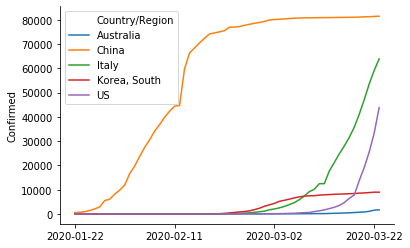

In [40]:
country_filter = df['Country/Region'].isin(['China','US','Italy','Australia','Korea, South'])
cases_per_day_subset = df[country_filter].groupby(['Country/Region','Date'])['Confirmed'].sum().reset_index()

g = sns.lineplot(data=cases_per_day_subset, x='Date', y='Confirmed', hue='Country/Region')
g.xaxis.set_major_locator(ticker.MultipleLocator(20))
g.set_xlabel('')
sns.despine()

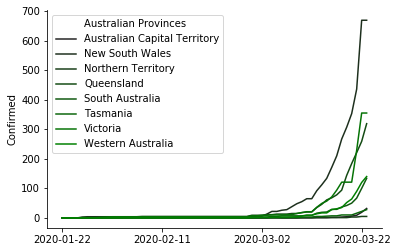

In [60]:
australian_cases = (df[df['Country/Region'] == 'Australia'].groupby(['Province/State','Date'])['Confirmed']
                    .sum()
                    .reset_index())
g = sns.lineplot(data=australian_cases, x='Date', y='Confirmed', hue='Province/State', 
                 palette=sns.dark_palette('green' , n_colors = australian_cases['Province/State'].nunique()))
g.xaxis.set_major_locator(ticker.MultipleLocator(20))
g.set_xlabel('')
g.legend().texts[0].set_text('Australian Provinces')
sns.despine()

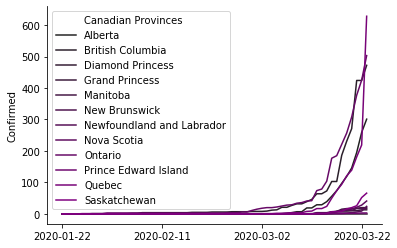

In [61]:
canada_cases = (df[df['Country/Region'] == 'Canada'].groupby(['Province/State','Date'])['Confirmed']
                    .sum()
                    .reset_index())
g = sns.lineplot(data=canada_cases, x='Date', y='Confirmed', hue='Province/State', 
                 palette=sns.dark_palette('purple' , n_colors = canada_cases['Province/State'].nunique()))
g.xaxis.set_major_locator(ticker.MultipleLocator(20))
g.set_xlabel('')
g.legend().texts[0].set_text('Canadian Provinces')
sns.despine()